Experiment 1: Largest radius is 70.71067811865476 pixels in radius.
Experiment 1: Center of the largest circle is at ( 113.0 , 0.0 ).


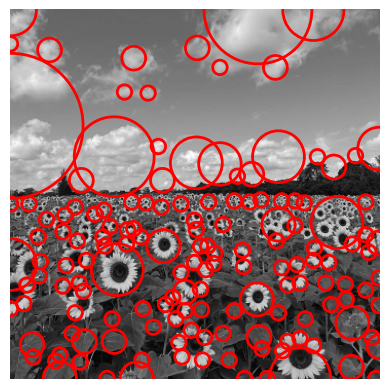

Experiment 2: Largest radius is 28.284271247461902 pixels in radius.
Experiment 2: Center of the largest circle is at ( 359.0 , 282.0 ).


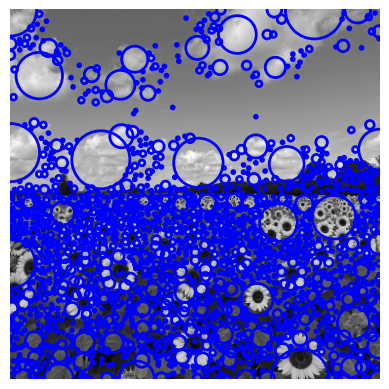

Experiment 3: Largest radius is 42.42640687119285 pixels in radius.
Experiment 3: Center of the largest circle is at ( 0.0 , 234.0 ).


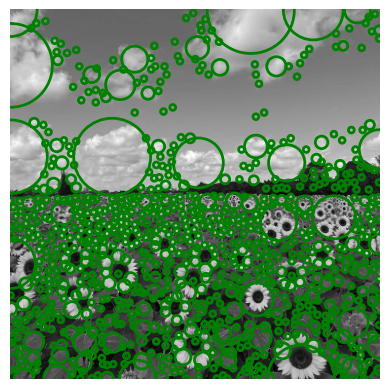

In [5]:
from skimage.feature import blob_log
import math
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

im = cv.imread('the_berry_farms_sunflower_field.jpeg' , cv.IMREAD_REDUCED_COLOR_4 )
gray_image = cv.cvtColor(im, cv.COLOR_BGR2GRAY)


# Experiment 1: Focus on larger circles (larger sunflowers)
blobs_log = blob_log(gray_image, min_sigma=5, max_sigma=50, num_sigma=15, threshold=.05)
# This range of sigma values is adjusted to capture larger structures

# Adjust the radius
blobs_log[:, 2] = blobs_log[:, 2] * math.sqrt(2)

# Find the largest blob
b = max(blobs_log[:, 2])
x0, y0, r = blobs_log[np.where(blobs_log[:, 2] == b)[0][0]]

# Plotting
fig, ax = plt.subplots()
ax.imshow(gray_image, cmap='gray')
ax.axis('off')

# Draw the circles
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False)
    ax.add_patch(c)

print("Experiment 1: Largest radius is", b, "pixels in radius.")
print("Experiment 1: Center of the largest circle is at (", x0, ",", y0, ").")
plt.show()

# Experiment 2: Detect smaller details, lowering threshold for more sensitivity
blobs_log = blob_log(gray_image, min_sigma=1, max_sigma=20, num_sigma=20, threshold=.02)
# Lower min_sigma to detect smaller blobs, increase num_sigma for finer granularity

# Adjust the radii
blobs_log[:, 2] = blobs_log[:, 2] * math.sqrt(2)

# Find the largest blob
b = max(blobs_log[:, 2])
x0, y0, r = blobs_log[np.where(blobs_log[:, 2] == b)[0][0]]

# Plotting
fig, ax = plt.subplots()
ax.imshow(gray_image, cmap='gray')
ax.axis('off')

# Draw the circles
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='blue', linewidth=2, fill=False)
    ax.add_patch(c)

print("Experiment 2: Largest radius is", b, "pixels in radius.")
print("Experiment 2: Center of the largest circle is at (", x0, ",", y0, ").")
plt.show()

# Experiment 3: High sensitivity, smaller blobs, and finer detection
blobs_log = blob_log(gray_image, min_sigma=2, max_sigma=30, num_sigma=25, threshold=.01)
# Increase num_sigma to 25 for higher granularity and lower threshold for sensitivity

# Adjust the radii
blobs_log[:, 2] = blobs_log[:, 2] * math.sqrt(2)

# Find the largest blob
b = max(blobs_log[:, 2])
x0, y0, r = blobs_log[np.where(blobs_log[:, 2] == b)[0][0]]

# Plotting
fig, ax = plt.subplots()
ax.imshow(gray_image, cmap='gray')
ax.axis('off')

# Draw the circles
for blob in blobs_log:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='green', linewidth=2, fill=False)
    ax.add_patch(c)

print("Experiment 3: Largest radius is", b, "pixels in radius.")
print("Experiment 3: Center of the largest circle is at (", x0, ",", y0, ").")
plt.show()
